In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("MukeshDataset.xlsx")


In [6]:
reg_no = df[['Regd No']].drop_duplicates()
mhrd = df[['MHRDName']].drop_duplicates()
courses = df[['Course']].drop_duplicates()

In [7]:
reg_no,mhrd.count(),courses

(         Regd No
 0     7751776776
 2     7753776776
 3     7754776776
 6     7755776776
 9     7756776776
 ...          ...
 1618  8133776776
 1629  8135776776
 1630  8136776776
 1631  8137776776
 1640  8138776776
 
 [257 rows x 1 columns], MHRDName    48
 dtype: int64,          Course
 0      WVODHY88
 1      WVODHY89
 2     VISJTC541
 3     VISJTC322
 4     VISJTC323
 ...         ...
 1624  FDNPLU192
 1625   FDNPLU38
 1626   FDNPLU39
 1627  FDNPLU449
 1628  FDNPLU533
 
 [753 rows x 1 columns])

In [8]:
ctype = df[['Course','CourseType']].drop_duplicates(subset='Course')
ctype

theory = ctype[ctype['CourseType'].eq('Theory')]
practical = ctype[ctype['CourseType'].eq('Practical')]
theory.dropna()
practical.dropna()


prac = practical.count()
theo = theory.count()
prac,theo

(Course        30
 CourseType    30
 dtype: int64, Course        723
 CourseType    723
 dtype: int64)

([<matplotlib.patches.Wedge at 0x223b9c43b48>,
 [Text(1.0913950573561215, 0.13732016887052031, 'Practical Courses'),
  Text(-1.0913950573561215, -0.13732016887052037, 'Theoretical Courses')],
 [Text(0.5953063949215208, 0.07490191029301108, '3.98'),
  Text(-0.5953063949215208, -0.0749019102930111, '96.02')])

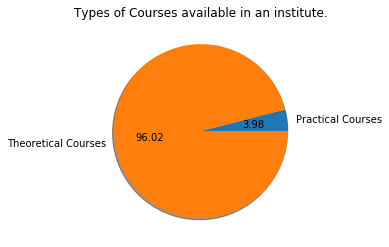

In [9]:
plt.title('Types of Courses available in an institute.')
plt.pie((prac['Course'],theo['Course']),labels=['Practical Courses','Theoretical Courses'],autopct='%.2f',shadow=True)

C:\Users\Mukesh\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


([<matplotlib.patches.Wedge at 0x223b9b6ef48>,
 [Text(-0.033610930578962334, 1.099486382519409, 'Day Scholars'),
  Text(0.03361082763761719, -1.0994863856662866, 'Hostelers')],
 [Text(-0.01833323486125218, 0.5997198450105867, '50.97'),
  Text(0.018333178711427554, -0.5997198467270654, '49.03')])

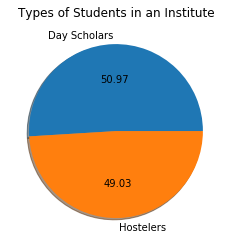

In [10]:
scholar = df[['Regd No','ScholarType']].drop_duplicates(subset='Regd No')
scholar

day = scholar[scholar.eq('Day Scholar')]
hosteler = scholar[scholar.eq('Hostler')]

day = day['ScholarType'].dropna()
hosteler = hosteler['ScholarType'].dropna()

plt.title('Types of Students in an Institute')
plt.pie((day.count(),hosteler.count()),labels=['Day Scholars','Hostelers'],autopct='%.2f',shadow=True)